# MNIST Project 

## Importing DataSet and Liabraries 

In [55]:
from keras.datasets import mnist 

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

import matplotlib.pyplot as plt 

seed = 7
np.random.seed(seed)

## Load the dataset 

In [56]:
(X_train,y_train) , (X_test, y_test) = mnist.load_data()

## Plotting images of the dataset.

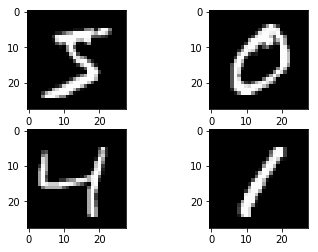

In [57]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# Data Analysis 

In [58]:
print("The Shape of the data is:")
print("X_train:", X_train.shape, " and y_train:",y_train.shape)
print("X_test:", X_test.shape, " and y_test:",y_test.shape)

The Shape of the data is:
X_train: (60000, 28, 28)  and y_train: (60000,)
X_test: (10000, 28, 28)  and y_test: (10000,)


The data set is an array of 3 dimensions of instance, image width and image height.

I am gonna try doing it first without convolutional neural network. Therefore the method ML method im gonna use is Multi-Layer Neural Network. For the same, we gotta turn the images into vectors of pixels. The images are 28x28, which would mean we need a vector of 784.

We can us NumPy reshape to readjsut the size of the dataset.



In [59]:
num_pixels = X_train.shape[1] *X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print('The new shape of the training input is:',X_train.shape)

print(X_train)

The new shape of the training input is: (60000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Since the grayscale value goes from 0 to 255, we can normalize the data by dividing by the maximum value. This would be 255.

In [65]:
X_train = X_train / 255
X_test = X_test /255|

(60000, 784)


Now we have values from 1 to 9. This would be a multi-class classification. Therefore its good to implement one hot encoding. Transforming the values into binary vectors. 

In [61]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
print ("We can see that the amount of classes are %d, from 0 to 9:" % num_classes)

We can see that the amount of classes are 10, from 0 to 9:


## Now we can define the model 

We can do so using a the sequential from keras 

There is gonna be a hidden layer with the size of the amount of pixels per image that will use that information to categorize it using relu. Relu is better than sigmoid when it comes to categorizing one value or the other. Then we have the output layer that uses a softmax function to calculate the percentage of 1 value in contrast of the other 10 possibilities. 

In [31]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',activation='relu'))
    model.add(Dense(num_classes, input_dim=num_classes, kernel_initializer='normal',activation='softmax'))
    
    model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
    return model

In [39]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%% \nAccuracy: %.2f%%" % (100-scores[1]*100, scores[1]*100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.0127 - acc: 0.9171 - val_loss: 0.0066 - val_acc: 0.9583
Epoch 2/10
 - 1s - loss: 0.0054 - acc: 0.9669 - val_loss: 0.0044 - val_acc: 0.9719
Epoch 3/10
 - 2s - loss: 0.0037 - acc: 0.9775 - val_loss: 0.0039 - val_acc: 0.9748
Epoch 4/10
 - 2s - loss: 0.0027 - acc: 0.9840 - val_loss: 0.0035 - val_acc: 0.9771
Epoch 5/10
 - 2s - loss: 0.0021 - acc: 0.9880 - val_loss: 0.0034 - val_acc: 0.9770
Epoch 6/10
 - 2s - loss: 0.0016 - acc: 0.9910 - val_loss: 0.0030 - val_acc: 0.9808
Epoch 7/10
 - 2s - loss: 0.0014 - acc: 0.9925 - val_loss: 0.0031 - val_acc: 0.9797
Epoch 8/10
 - 1s - loss: 0.0011 - acc: 0.9941 - val_loss: 0.0029 - val_acc: 0.9809
Epoch 9/10
 - 2s - loss: 0.0010 - acc: 0.9943 - val_loss: 0.0030 - val_acc: 0.9805
Epoch 10/10
 - 1s - loss: 7.5956e-04 - acc: 0.9962 - val_loss: 0.0029 - val_acc: 0.9810
Baseline Error: 1.90% 
Accuracy: 98.10%
